---

Universidade Federal de Uberlândia

Faculdade de Engenharia Elétrica

Imagens Médicas 2

Discente: Levy Gabriel da S. G.

---

# Tarefa 8 - Filtros de frequência

## Introdução

A principal diferença entre um filtro passa-baixas ideal e um filtro de média no domínio espacial é que, o filtro ideal só pode ser aplicado no domínio da frequência e digitalmente, já que estes não podem ser implementados físicamente por meio de componentes eletrônicos. Outra diferença é que os filtros de média espacial possuem seletividade crescente com o tamanho do *kernel* do filtro, enquanto que para o domínio da frequência o tamanho do *kernel* é sempre o mesmo.

Considerando resultados semelhantes para ambas as categorias de filtro, aquele no domínio espacial possui simples construção uma vez que basta montar o seu *kernel* que será convolucionado com a imagem de interesse. Já a construção do filtro na frequência deve ser levado em conta vários fatores de desempenho e suavidade na resposta em frequência para que a região de corte e passagem sejam atendidas e que o efeitos de *ringing* seja atenuado.

Em relação ao desempenho computacional, como cada filtro na frequência pode ser implementado no domínio espacial e, se há um simples *kernel* no domínio espacial que obtenha o efeito desejado, um filtro espacial possui vantagens por gastar menos recursos computacionais, uma vez que basta seu *kernel* ser convolvido com a imagem de interesse que o resultado pode ser obtido. 

Porém ao aumentar drasticamente o tamanho do *kernel* do filtro no domínio espacial será requisitado maiores recursos computacionais, enquanto que os filtros no domínio da frequência possuem um gasto de recurso computacional independente da função do filtro.

## Processamento

Inicialmente carrega-se e mostra-se a imagem que será utilizada durante a tarefa.

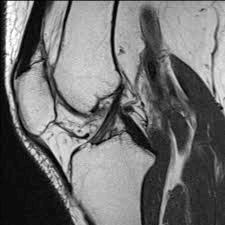

In [1]:
pkg load image
img = double(imread('ressonancia 7_1.jpg'));
imshow(img)

Também considerando a matrícula de número: **1202XPMV508**

Os enunciados explicitas que a frequência de corte dos filtros sejam correspondente aos dois últimos algarismos do número de matrícula anteriormente especificado. Já a ordem dos filtros (quando solicitados), devem ser igual ao último número da matrícula mais um, portanto:

In [2]:
f_cutoff = 8;
order = 8+1;

Comum aos filtros projetados existe o fato $D(u,v)$ que corresponde à distância do ponto $(u,v)$ à oridem do plano de frequência, dado por:

\begin{align}
D(u,v) = (u^2+v^2)^{1/2}
\end{align}

### Filtro passa-baixas ideal

O projeto do filtro passa-baixas ideal foi realizado de acordo com a seguinte lei matemática:

\begin{align}
H(u,v) = 1 \; se \; D(u,v) \leq D_0 \\
H(u,v) = 0 \; se \; D(u,v) > D_0
\end{align}


Para o projeto do filtro passa-baixas ideal, tem-se:

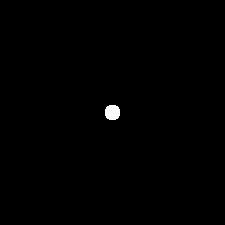

In [3]:
[M,N] = size(img);
ideal_LP = zeros(M,N);
cx = floor(M/2)+1;
cy = floor(N/2)+1;
for x= 1:M
    for y= 1:N
        D=sqrt(power((x-cx),2)+power((y-cy),2));
        if (D < f_cutoff)
            ideal_LP(x,y)=1;
        end
    end
end
imshow(ideal_LP)

Em sua resposta nota-se que apenas o centro está preenchido por pixels de valor 1 e que representam as componentes de baixa frequência.

### Filtro passa-altas ideal

Uma vez que o filtro passa-altas ideal possui mesma frequência de corte que o filtro passa-baixas ideal, tem-se que sua resposta é complementar a este filtro, portanto:

\begin{align}
H(u,v) = 0 \; se \; D(u,v) \leq D_0 \\
H(u,v) = 1 \; se \; D(u,v) > D_0
\end{align}

Computacionalmente:

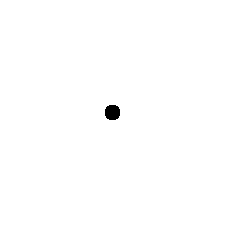

In [4]:
ideal_HP = 1-ideal_LP;
imshow(ideal_HP)

Mas para um resultado mais conclusivo, também será mostrado o passo-a-passo completo para projetar o filtro:

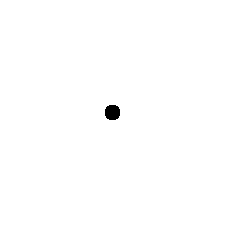

In [5]:
[M,N] = size(img);
ideal_HP = zeros(M,N);
cx = floor(M/2)+1;
cy = floor(N/2)+1;
for x= 1:M
    for y= 1:N
        D=sqrt(power((x-cx),2)+power((y-cy),2));
        if (D >= f_cutoff)
            ideal_HP(x,y)=1;
        end
    end
end
imshow(ideal_HP)

Em sua resposta nota-se o oposto do filtro passa-baixas, uma vez que não mais o centro limitado pela frequência de corte está preenchido por pixels de valor 1, mas sim o entorno e que representa as frequências acima da de corte.

### Filtro passa-baixas Butterworth

Vide abaixo a implementação do filtro passa-baixas Butterworth de acordo com a regra: 

\begin{align}
H(u,v) = \frac{1}{1+[D(u,v)/D_0]^{2n}}
\end{align}

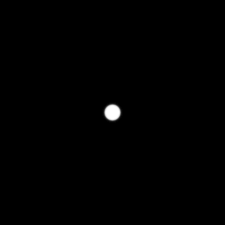

In [6]:
[M,N] = size(img);
butterworth_LP = zeros(M,N);
cx = floor(M/2)+1;
cy = floor(N/2)+1;
for x= 1:M
    for y= 1:N
        D=sqrt(power((x-cx),2)+power((y-cy),2));
        butterworth_LP(x,y)=1/(1+power(D/f_cutoff,2*order));
    end
end
imshow(butterworth_LP)

A resposta do filtro passa-baixas Butterworth é semelhante à do filtro ideal, porém observa-se nos pixels vizinhos à frequência de corte um borramento com pixels em escala de cinza, mostrando a transição suave entre frequências que é a característica principal desse filtro e que o permite ser implementado fisicamente.

### Filtro passa-altas gaussiano

Vide abaixo a implementação do filtro passa-altas gaussiano de acordo com a regra: 

\begin{align}
H(u,v) = 1 - e^{-D^2(u,v)/2D_0^2}
\end{align}

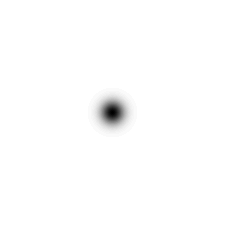

In [7]:
[M,N] = size(img);
gaussian_HP = zeros(M,N);
cx = floor(M/2)+1;
cy = floor(N/2)+1;
for x= 1:M
    for y= 1:N
        D=sqrt(power((x-cx),2)+power((y-cy),2));
        gaussian_HP(x,y)=1 - exp(-power(D,2)/(2*power(f_cutoff,2)));
    end
end
imshow(gaussian_HP)

A resposta do filtro passa-altas Gaussiano associa a resposta do filtro passa-altas ideal com a implementabilidade do filtro Butterworth. Neste caso como a função do filtro é diferente da do Butterworth, o seu resultado na banda de corte do filtro é diferente, mostrando-se mais longa e com uma seletividade menor que a do filtro Butterworth, excluindo o fato de serem filtros de naturezas diferentes.

## Resultados

Nesta seção os filtros serão aplicados à imagem original e comparados em grupos, primeiro comparando os filtros passa-baixas e logo após os filtros passa-altas.

Porém, antes de qualquer implementação, a imagem original deve ser transformada para o domínio da frequência por meio da transformada discreta de Fourier 2D.

In [8]:
img_freq = fft2(img); % Fourier transform
img_freq_cent = fftshift(img_freq); % image frequency spectrum centralized

Em seguida os filtros são aplicados e em seguida a transformada inversa de Fourier é aplicada a cada resultado para que seja obtida a imagem filtrada no domínio espacial:

In [9]:
% Ideal low-pass
img_LP = ifftshift(img_freq_cent.*ideal_LP);
img_LP_filt = uint8(real(ifft2(img_LP)));

% Butterworth low-pass
img_BLP = ifftshift(img_freq_cent.*butterworth_LP);
img_BLP_filt = uint8(real(ifft2(img_BLP)));

% Ideal high-pass
img_HP = ifftshift(img_freq_cent.*ideal_HP);
img_HP_filt = uint8(real(ifft2(img_HP)));

% Gaussian high-pass
img_GHP = ifftshift(img_freq_cent.*gaussian_HP);
img_GHP_filt = uint8(real(ifft2(img_GHP)));

### Filtros passa-baixas

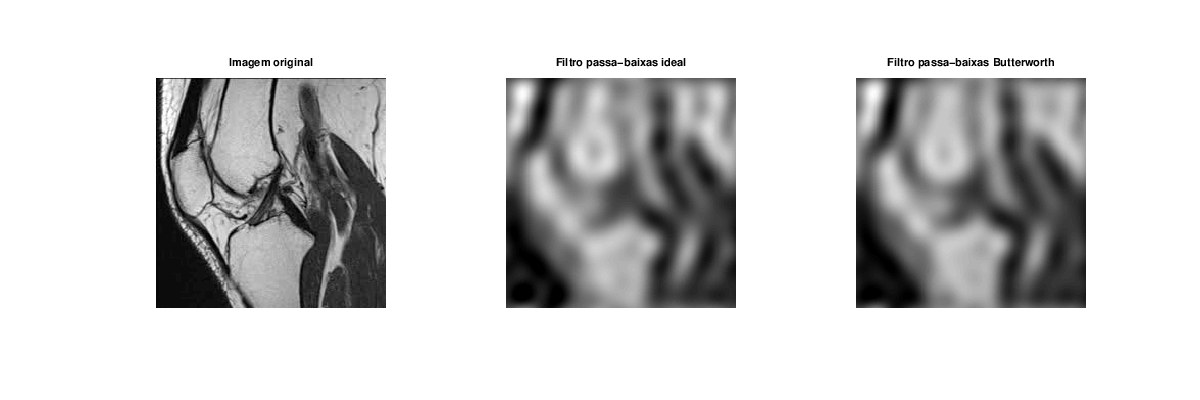

In [10]:
figure();

subplot(1,3,1);
imshow(uint8(img));
title('Imagem original');

subplot(1,3,2);
imshow(uint8(img_LP_filt));
title('Filtro passa-baixas ideal');

subplot(1,3,3);
imshow(uint8(img_BLP_filt));
title('Filtro passa-baixas Butterworth');

set(gcf,'Position',[0 0 1200 400])

Ao observar os resultados dos filtros passa-baixas ideal e de Butterworth para essa imagem e essa frequência de corte (e ordem no caso do Butterworth), não se observa tanta diferença, apesar das imagens estarem borradas ao ponto de não perceber tanta diferença.

Mas o fato de que ambos os filtros possuem resultados semelhantes, mostra que, mesmo o Butterworth não sendo um filtro ideal, i.e. um filtro real, este ainda compartilha da efetividade da sua contraparte ideal.

### Filtros passa-altas

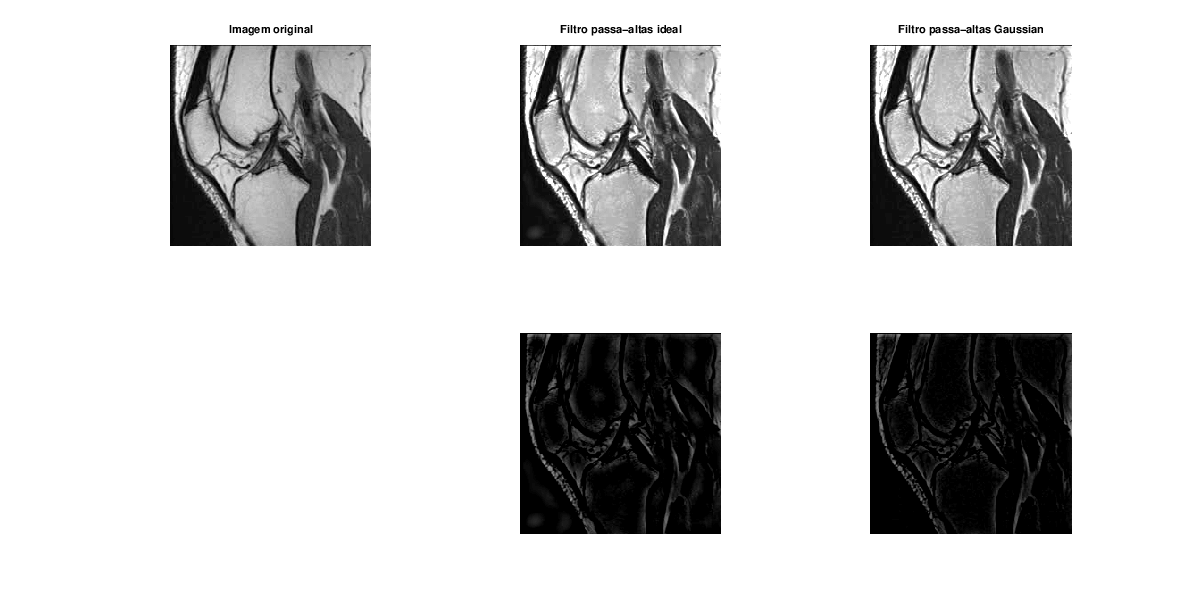

In [11]:
figure();

subplot(2,3,1);
imshow(uint8(img));
title('Imagem original');

subplot(2,3,2);
imshow(uint8(img+img_HP_filt));
title('Filtro passa-altas ideal');

subplot(2,3,3);
imshow(uint8(img+img_GHP_filt));
title('Filtro passa-altas Gaussian');

subplot(2,3,5);
imshow(uint8(img_HP_filt));

subplot(2,3,6);
imshow(uint8(img_GHP_filt));

set(gcf,'Position',[0 0 1200 600])

O mesmo raciocínio aplicado aos filtro passa-baixas podem ser replicado a estes. Isso pois o resultado dos filtros ideal e real compartilham das semelhanças com bons resultados de realce e mostra um caminho seguro para implementar os filtros reais na prática.